# A two period consumption-savings problem



In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm # for colormaps
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D # for 3d figures
from matplotlib.widgets import Slider

## The period utility function
def u(c,σ):
    if σ ==1:
        out = np.log(c)
    else:
        out = (c**(1-σ)-1)/(1-σ)
    return out

## Inverse utility function
def u_inv(x,σ):
    if σ==1:
        out = np.exp(x)
    else:
        out = (x*(1-σ)+1)**(1/(1-σ))
    return out

## Aggregate utility
def U(c1,c2,β,σ):
    out = u(c1,σ) + β*u(c2,σ)
    return out

## This function is to be minimized (just inverted maximum, necessary for the solver)
def problemfun(a_1,y_0,y_1,τ_0,τ_1,β,r,σ):
    #Overall utility function, with budget constraints plugged in for c_2 and c_2
    U = u(y_0-a_1-τ_0,σ) + β*u(y_1+ (1+r)*a_1-τ_1,σ)
    return -U

def solution_euler(y_0,y_1,τ_0,τ_1,β,r,σ):
    frac = 1+(β*(1+r))**(1/σ)/(1+r)
    opt_c0 = ( (y_0-τ_0) + (y_1-τ_1)/(1+r) ) / frac
    opt_c1 = (β*(1+r))**(1/σ) * opt_c0
    opt_a = y_0-τ_0- opt_c0
    opt_U = -problemfun(opt_a,y_0,y_1,τ_0,τ_1,β,r,σ) ##Remember: problemfun is inverted
    c_1_budget = (y_0-c_vec-τ_0)*(1+r) + y_1 - τ_1
    ## Recover the whole, optimal indifference curve 
    opt_indiff = u_inv(opt_U-β * u(c_vec,σ),σ)
    
    return opt_a,opt_c0,opt_c1,opt_U, c_1_budget,opt_indiff
    
## Function for σ!=1, because solution is *very* unstable
def plot_indifference_sigma(NU, lowb, upb,β,σ,cc ,ll = 'solid'):
    U_vec = np.linspace(lowb,upb,NU)
    for iU in range(U_vec.size):
        value = U_vec[iU]
        ## At large values of c_0, c_1 asymptotes at this value. There is no point in solve for lower c_1 values
        c1min = u_inv((value - u(1000,σ))/β,σ )
        c_vec = np.linspace(c1min, c_max, N)
        ## This recovers the whole indifference curve for U = value by solving the problem for c_1, as a function of c2
        c0vec = u_inv(value - β*u(c_vec,σ),σ )
        plt.plot(c0vec,c_vec,color=cc, linestyle = ll)
        plt.xlim(0,c_max)
        plt.ylim(0,c_max)
    plt.xlabel('$c_0$')
    plt.ylabel('$c_1$')

def plot_gov_2p(y_0,y_1,share,PV_G,β,r,σ):

    B = share*PV_G  ## The total amount the government defers to period 1
    τ_0 = G_0-B     ## Tax in period 0
    τ_1 = G_1 + B*(1+r) ## Tax in period 1
    
    # Plot some indifference curves
    lowb = -2
    upb  = 3
    NU = 5
    plot_indifference_sigma(NU, lowb, upb,β,σ,'navy')
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    
    ## This is a solving function, it takes the problem (problemfun) as input and minimizes it (but the problemfun is inverted, hence it maximizes)
    ## Because the utility function is not defined for 0, we need to optimize within bounds. 
    opt_a,opt_c0,opt_c1,opt_U, c_2_budget,opt_indiff = solution_euler(y_0,y_1,τ_0,τ_1,β,r,σ)

    opt_a0,opt_c00,opt_c10,opt_U0, c_2_budget0,opt_indiff0 = solution_euler(y_0,y_1,0,0,β,r,σ)

    #Plot
    plot_indifference_sigma(NU, lowb, upb,β,σ,'navy') ## plot the indifference curves again
    plt.plot(opt_indiff, c_vec, color ='red', label = 'Optimal indifference curve')
    plt.plot(opt_indiff0, c_vec, color ='black',linestyle = 'dashed')
    
    plt.plot(c_vec,c_2_budget, color = 'green') #plot budget
    plt.plot(c_vec,c_2_budget0, color = 'black',linestyle = 'dashed') #plot budget
    plt.scatter(opt_c0,opt_c1, color = 'green', label = 'Optimal allocation') #plot optimal allocation
    plt.scatter(opt_c00,opt_c10, color = 'black', label = 'Allocation without tax') #plot optimal allocation
    plt.scatter(y_0-τ_0,y_1-τ_1, color = 'orange', label = 'Allocation after tax') #original allocation
    plt.scatter(y_0,y_1, color = 'purple', label = 'Original allocation') #original allocation
    plt.arrow(y_0-τ_0,y_1-τ_1, 0, y_0-τ_0-opt_c0)
    plt.arrow(y_0-τ_0,opt_c1, y_1-τ_1-opt_c1, 0)
    plt.legend(loc='upper right', frameon = 'false')
    
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    print(r'$c_0$ consumption :',opt_c0)
    print(r'$c_1$ consumption :',opt_c1)
    
## The indifference curves
# A vector for consumption values
c_vec = np.linspace(10**(-10),3,1000)

# a. Create numbers distributed evenly between a small number and c_max
c_max = 5
N = 200
c_vec = np.linspace(0.001,c_max,N)




$c_0$ consumption : 2.2473275024295436
$c_1$ consumption : 2.26530612244898


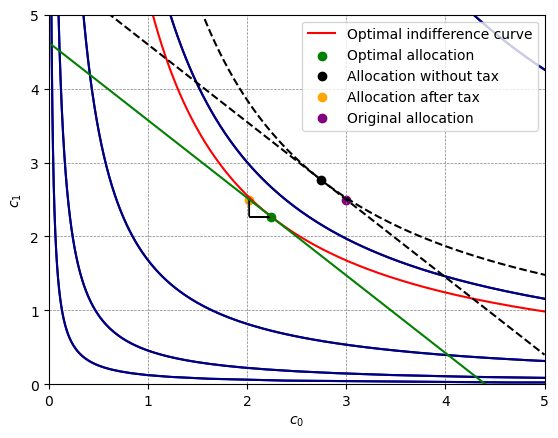

$c_0$ consumption : 2.2473275024295436
$c_1$ consumption : 2.26530612244898


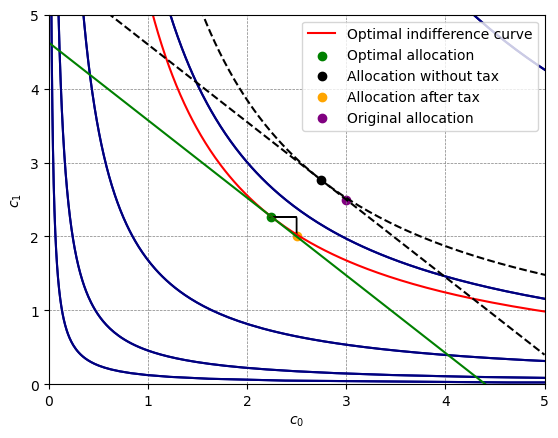

$c_0$ consumption : 2.2473275024295436
$c_1$ consumption : 2.26530612244898


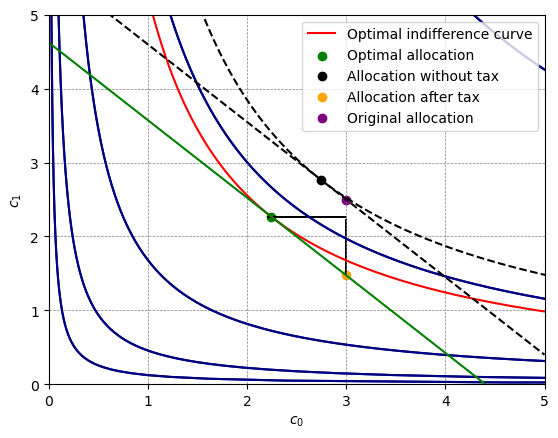

In [106]:
## Find the indifference curves and solve the problem
# max          U = u(c_1) + β u(c_2) 
# s.t. c_1 + a_1 = y_1 
#            c_2 = y_2 + (1+r) a_1

β   = 0.96
r   = 0.05
y_0 = 3
y_1 = 2.5
σ   = 1
G_0 = 0.5
G_1 = 0.5

#############################################################################
#PV of gov't spending
PV_G = G_0 + G_1/(1+r)

#############################################################################
share = -( G_1/(1+r) ) /PV_G ## Pay all in period 0
plot_gov_2p(y_0,y_1,share,PV_G,β,r,σ)
plt.savefig('gov_2p_s0.pdf')
plt.show()

share = 0 ## Balanced budget
plot_gov_2p(y_0,y_1,share,PV_G,β,r,σ)
plt.savefig('gov_2p_sb.pdf')
plt.show()

share = G_0/PV_G ## Pay all in period 1
plot_gov_2p(y_0,y_1,share,PV_G,β,r,σ)
plt.savefig('gov_2p_s1.pdf')
plt.show()